Solo Destination App Google Play Store Review Scrapping


In [ ]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews_all


id_reviews = reviews_all(
    'com.gamatechno.solodestinationnew',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='ID', # defaults to 'US'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
df_solodestination = pd.DataFrame(np.array(id_reviews),columns=['review'])


df_solodestination = df_solodestination.join(pd.DataFrame(df_solodestination.pop('review').tolist()))


df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT


In [ ]:
df_solodestination.shape

(215, 10)

In [ ]:
df_solodestination['score'].mean()

4.2

In [ ]:
df_solodestination.to_csv('review_solodestination')

Translate from Bahasa to English

In [ ]:
!pip install googletrans==4.0.0-rc1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import googletrans
from googletrans import *
translator = googletrans.Translator()

In [ ]:
df_solodestination.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
dtype: object

In [ ]:
df_solodestination['content'] = df_solodestination['content'].astype('str')

In [ ]:
df_solodestination['translated'] = df_solodestination['content'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))

In [ ]:
df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,translated
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT,keren..
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT,Proud to be a solo child
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT,Solo the mantle
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT,Improve!!
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT,APK which is very informative for the explorat...


Sentiment Analysis

In [ ]:
!pip install transformers
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
from transformers import pipeline


sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
df_solodestination['result'] = df_solodestination['translated'].apply(lambda x: sentiment_analysis(x[:512]))

In [ ]:
df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,translated,result
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT,keren..,"[{'label': '3 stars', 'score': 0.2690261900424..."
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT,Proud to be a solo child,"[{'label': '5 stars', 'score': 0.6647722125053..."
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT,Solo the mantle,"[{'label': '3 stars', 'score': 0.2799476683139..."
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT,Improve!!,"[{'label': '5 stars', 'score': 0.3332316279411..."
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT,APK which is very informative for the explorat...,"[{'label': '4 stars', 'score': 0.5263288021087..."


In [ ]:
df_solodestination['sentiment_label'] = df_solodestination['result'].apply(lambda x: (x[0]['label']))

In [ ]:
df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,translated,result,sentiment_label
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT,keren..,"[{'label': '3 stars', 'score': 0.2690261900424...",3 stars
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT,Proud to be a solo child,"[{'label': '5 stars', 'score': 0.6647722125053...",5 stars
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT,Solo the mantle,"[{'label': '3 stars', 'score': 0.2799476683139...",3 stars
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT,Improve!!,"[{'label': '5 stars', 'score': 0.3332316279411...",5 stars
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT,APK which is very informative for the explorat...,"[{'label': '4 stars', 'score': 0.5263288021087...",4 stars


In [ ]:
df_solodestination['sentiment_score'] = df_solodestination['result'].apply(lambda x: (x[0]['score']))

In [ ]:
df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,translated,result,sentiment_label,sentiment_score
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT,keren..,"[{'label': '3 stars', 'score': 0.2690261900424...",3 stars,0.269026
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT,Proud to be a solo child,"[{'label': '5 stars', 'score': 0.6647722125053...",5 stars,0.664772
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT,Solo the mantle,"[{'label': '3 stars', 'score': 0.2799476683139...",3 stars,0.279948
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT,Improve!!,"[{'label': '5 stars', 'score': 0.3332316279411...",5 stars,0.333232
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT,APK which is very informative for the explorat...,"[{'label': '4 stars', 'score': 0.5263288021087...",4 stars,0.526329


In [ ]:
df_solodestination.shape

(215, 14)

In [ ]:
df_solodestination['sentiment_score'].mean()

0.4739183231148609

In [ ]:
df_solodestination['sentiment_label'].value_counts()

5 stars    71
4 stars    69
3 stars    39
1 star     33
2 stars     3
Name: sentiment_label, dtype: int64

In [ ]:
df_solodestination['sentiment_label'].value_counts(normalize=True)

5 stars    0.330233
4 stars    0.320930
3 stars    0.181395
1 star     0.153488
2 stars    0.013953
Name: sentiment_label, dtype: float64

In [ ]:
df_solodestination.to_csv('sentiment_result_solodestination')

Visualization

In [ ]:
figure = px.histogram(df_solodestination, x='sentiment_label', color='sentiment_label', text_auto=True)
figure.show()

In [ ]:
figure.update_layout(
    font=dict(size=18),
)

Emotion Detection

In [ ]:
emotion_class = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion')

In [ ]:
df_solodestination['emotion_class'] = df_solodestination['translated'].apply(lambda x: emotion_class(x))

In [ ]:
df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,translated,result,sentiment_label,sentiment_score,emotion_class
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT,keren..,"[{'label': '3 stars', 'score': 0.2690261900424...",3 stars,0.269026,"[{'label': 'anger', 'score': 0.5885781049728394}]"
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT,Proud to be a solo child,"[{'label': '5 stars', 'score': 0.6647722125053...",5 stars,0.664772,"[{'label': 'joy', 'score': 0.9984673857688904}]"
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT,Solo the mantle,"[{'label': '3 stars', 'score': 0.2799476683139...",3 stars,0.279948,"[{'label': 'joy', 'score': 0.9243853092193604}]"
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT,Improve!!,"[{'label': '5 stars', 'score': 0.3332316279411...",5 stars,0.333232,"[{'label': 'joy', 'score': 0.9855895638465881}]"
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT,APK which is very informative for the explorat...,"[{'label': '4 stars', 'score': 0.5263288021087...",4 stars,0.526329,"[{'label': 'joy', 'score': 0.9954103827476501}]"


In [ ]:
df_solodestination['emotion_label'] = df_solodestination['emotion_class'].apply(lambda x: (x[0]['label']))
df_solodestination['emotion_score'] = df_solodestination['emotion_class'].apply(lambda x: (x[0]['score']))

In [ ]:
df_solodestination.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,translated,result,sentiment_label,sentiment_score,emotion_class,emotion_label,emotion_score
0,5bcec0bd-ab3c-4d74-9520-d9bd4f7bee01,Muljadi Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,keren..,5,0,1.225.150.4559,2023-03-23 00:59:41,None,NaT,keren..,"[{'label': '3 stars', 'score': 0.2690261900424...",3 stars,0.269026,"[{'label': 'anger', 'score': 0.5885781049728394}]",anger,0.588578
1,713d4e26-ab3e-4c86-894b-253e572e29be,Winda Rovita,https://play-lh.googleusercontent.com/a-/ACB-R...,Bangga menjadi anak solo,5,0,1.225.150.4559,2023-03-03 01:21:24,None,NaT,Proud to be a solo child,"[{'label': '5 stars', 'score': 0.6647722125053...",5 stars,0.664772,"[{'label': 'joy', 'score': 0.9984673857688904}]",joy,0.998467
2,6c165652-5c0d-4eb0-b321-a2c9cde5360a,Imam Rila Pambudi,https://play-lh.googleusercontent.com/a-/ACB-R...,Solo mantul,5,0,1.225.150.4559,2023-02-23 06:18:11,None,NaT,Solo the mantle,"[{'label': '3 stars', 'score': 0.2799476683139...",3 stars,0.279948,"[{'label': 'joy', 'score': 0.9243853092193604}]",joy,0.924385
3,a78fc9db-53ba-4cbe-8f48-ed3e68c01957,Ery Ekklesia,https://play-lh.googleusercontent.com/a-/ACB-R...,Tingkatkan!!,5,0,1.218.148.4227,2023-02-21 12:44:40,None,NaT,Improve!!,"[{'label': '5 stars', 'score': 0.3332316279411...",5 stars,0.333232,"[{'label': 'joy', 'score': 0.9855895638465881}]",joy,0.985590
4,7ede9497-cf1f-4023-81fa-25e873918b40,Nur Muhammad Rubiansyah,https://play-lh.googleusercontent.com/a-/ACB-R...,Apk yang sangat informatif guna eksplorasi kot...,5,0,1.225.150.4559,2023-02-06 10:26:56,None,NaT,APK which is very informative for the explorat...,"[{'label': '4 stars', 'score': 0.5263288021087...",4 stars,0.526329,"[{'label': 'joy', 'score': 0.9954103827476501}]",joy,0.995410


In [ ]:
df_solodestination.to_excel('result_solodestination.xlsx')

In [ ]:
df_solodestination.shape

(215, 17)

In [ ]:
df_solodestination['emotion_label'].value_counts()

joy         146
anger        47
fear         12
sadness       8
surprise      2
Name: emotion_label, dtype: int64

In [ ]:
df_solodestination['emotion_score'].mean()

0.8436640562013138

In [ ]:
df_solodestination.to_csv('sentiment_result_solodestination')

Emotion Score Visualization

In [ ]:
figure = px.histogram(df_solodestination, x='emotion_label', color='emotion_label', text_auto=True)
figure.show()

In [ ]:
figure.update_layout(
    font=dict(size=18),
)

Word Cloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import matplotlib.pyplot as plt

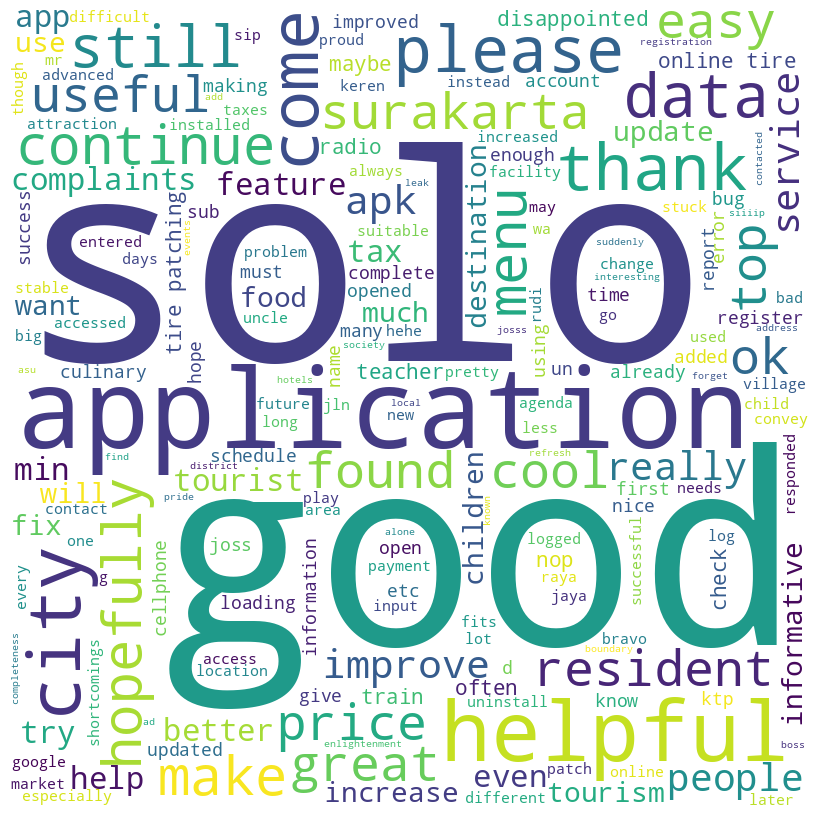

In [ ]:
# Reads csv file
df_solodestination['wordcloud'] = pd.DataFrame(df_solodestination['translated'])
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_solodestination['translated']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# save the figure as an image file
plt.savefig('wordcloud.png')
 
plt.show()

In [ ]:
from collections import Counter

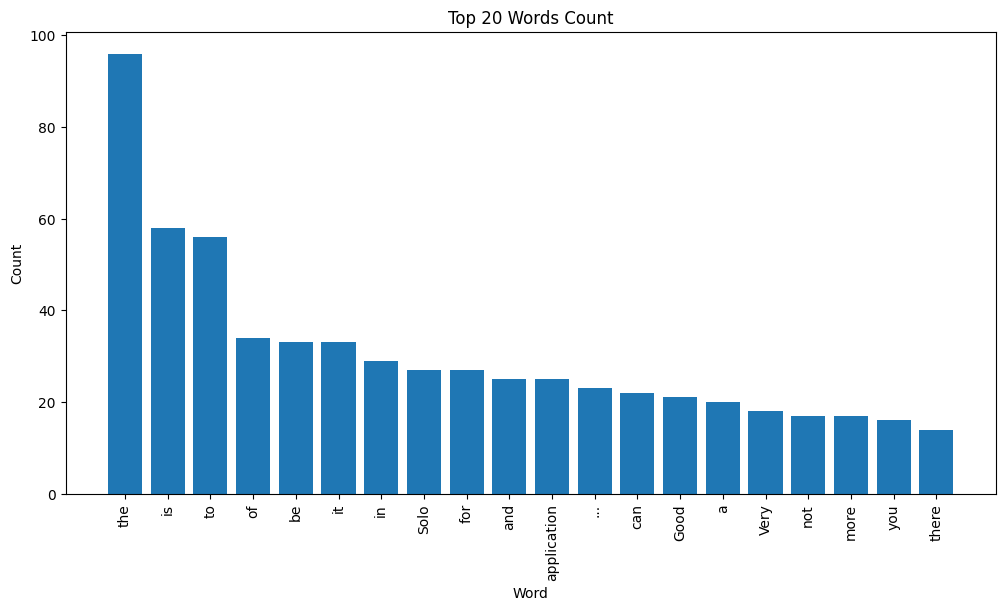

In [ ]:
# Split text into words and count word occurrences
words = ' '.join(df_solodestination['translated']).split()
word_counts = dict(Counter(words))

# Get top 20 words
top_20_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# Create a DataFrame from top 20 words
top_20_words_df = pd.DataFrame(list(top_20_words.items()), columns=['Word', 'Count'])

# Plot bar chart
plt.figure(figsize=(12, 6)) # Set the size of the figure
plt.bar(top_20_words_df['Word'], top_20_words_df['Count']) # Plot the bar chart
plt.xlabel('Word') # Set x-axis label
plt.ylabel('Count') # Set y-axis label
plt.title('Top 20 Words Count') # Set title
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show() # Show the plot